In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro,kstest,normaltest

import warnings
warnings.filterwarnings("ignore")

## 1.Problem Statement

In [ ]:
# To predict charges based on following features
# 'age', 'sex', 'bmi', 'children', 'smoker', 'region'

## 2)Data Gathering

In [3]:
df = pd.read_csv("medical_insurance.csv")
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## 3) Exploratory Data Analysis (EDA ) OR DQ check

#### - column wise analysis

In [4]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [5]:
df["sex"].unique()

array(['female', 'male', 'Female', 'MALE'], dtype=object)

In [6]:
df["sex"] = df["sex"].str.lower()

In [7]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [8]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [11]:
df["bmi"].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [9]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df['charges'].unique()  #df['charges'].unique().tolist()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
pd.DataFrame({"Missing count": df.isna().sum(),"Missing per": df.isna().mean()})

,Missing count,Missing per
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [18]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

#### visualization

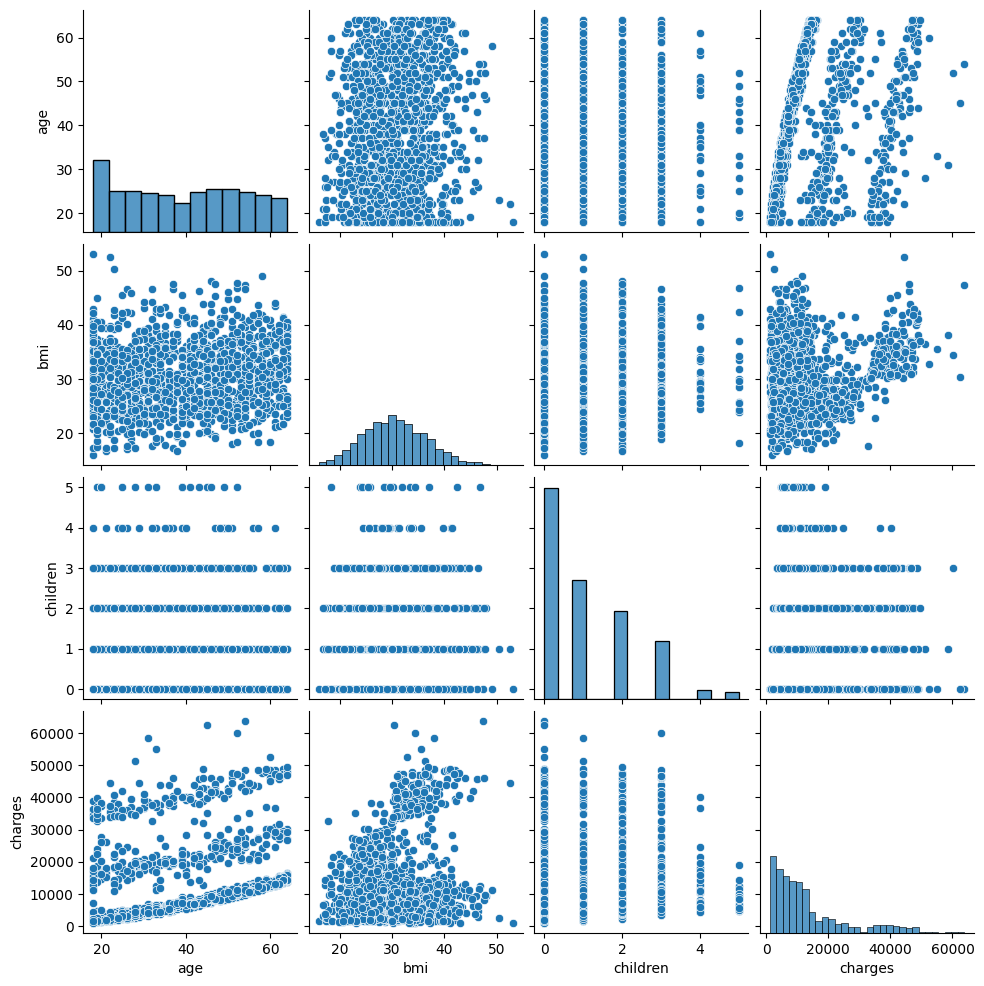

In [20]:
sns.pairplot(df)

<Axes: xlabel='smoker', ylabel='charges'>

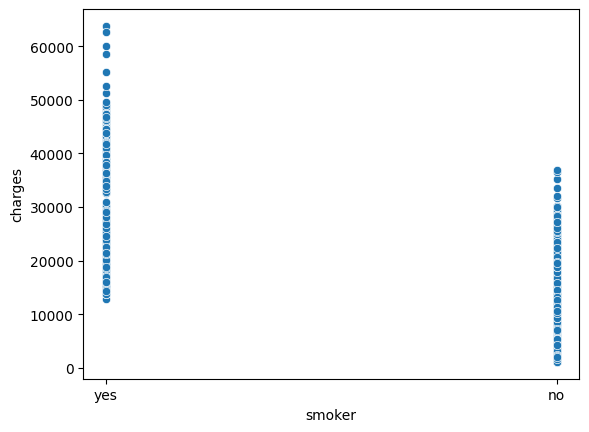

In [22]:
sns.scatterplot(data=df, x='smoker', y='charges')

<Axes: xlabel='smoker', ylabel='charges'>

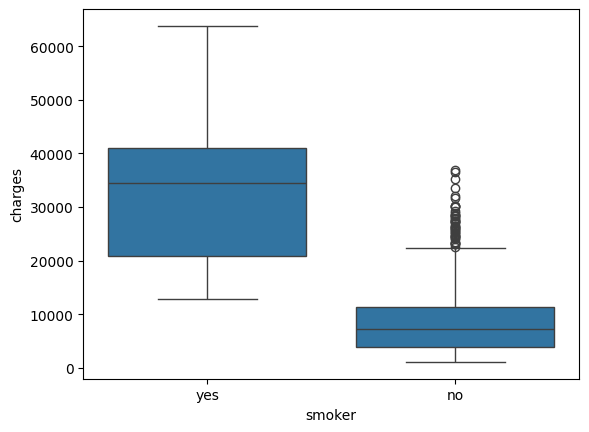

In [23]:
sns.boxplot(data=df, x='smoker', y='charges')

<Axes: xlabel='age', ylabel='charges'>

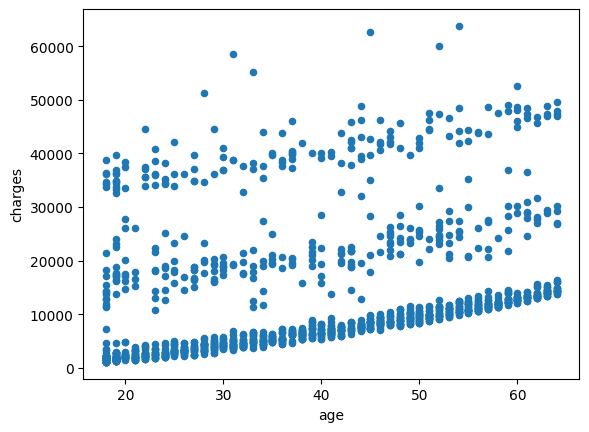

In [24]:
df.plot(x = "age",y="charges",kind = "scatter")

### EDA

In [26]:
df[(df["smoker"] == "no") & (df["charges"] >=20000)]["age"].min()
df[(df["smoker"] == "no") & (df["charges"] >=20000)]["age"].max()

np.int64(64)

In [27]:
df[(df['smoker'] == 'no') & (df['charges'] >= 20000)] ['age'].min()

np.int64(18)

In [29]:
df[(df['smoker'] =='no') & (df['charges']>=20000) & (df['age'] == 18)]

,age,sex,bmi,children,smoker,region,charges
102,18,female,30.115,0,no,northeast,21344.8467


<Axes: xlabel='region', ylabel='charges'>

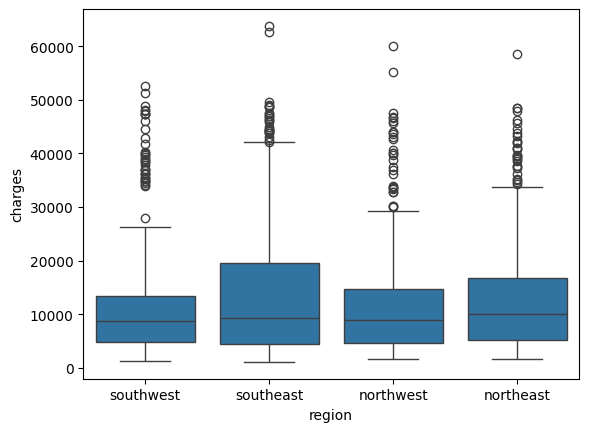

In [30]:
sns.boxplot(data=df,x='region',y='charges')

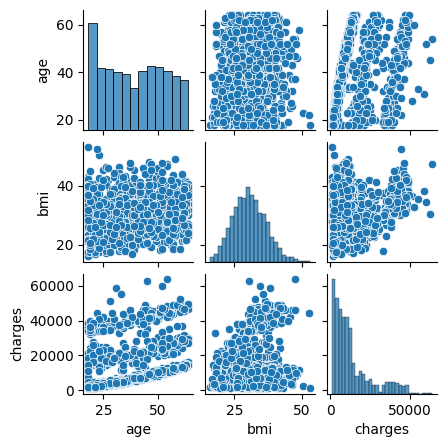

In [33]:
sns.pairplot(data=df, vars=['age','bmi','charges'],height=1.5)

In [34]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [37]:
pd.crosstab(df['sex'],df['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [38]:
pd.crosstab(df["age"],df["region"])

region,northeast,northwest,southeast,southwest
age,,,,
18,32,0,37,0
19,0,34,3,31
20,6,7,8,8
21,7,7,7,7
22,7,7,8,6
23,7,7,7,7
24,7,7,7,7
25,7,7,7,7
26,7,7,7,7


In [39]:
df.groupby("age").agg(region_cnt = ("region","value_counts")).reset_index()

,age,region,region_cnt
0,18,southeast,37
1,18,northeast,32
2,19,northwest,34
3,19,southwest,31
4,19,southeast,3
...,...,...,...
180,63,northeast,5
181,64,southeast,8
182,64,northwest,5
183,64,southwest,5


In [40]:
df[df["region"] =="northeast"]["age"].min(),df[df["region"] =="northeast"]["age"].max()

(np.int64(18), np.int64(64))

In [41]:
df.groupby("region").agg(age_min = ("age","min"),
                        age_max = ("age","max")).reset_index()

,region,age_min,age_max
0,northeast,18,64
1,northwest,19,64
2,southeast,18,64
3,southwest,19,64


In [42]:
df1 = df[(df["sex"] == "female") & (df["smoker"] == "no")]
np.average(df1["charges"])

np.float64(8762.297299541133)

In [43]:
df1 = df[(df["sex"] == "female") & (df["smoker"] == "yes")]
np.average(df1["charges"])

np.float64(30678.996276260867)

In [44]:
df1 = df[(df["sex"] == "male") & (df["smoker"] == "no")]
np.average(df1["charges"])

np.float64(8087.204731276595)

In [45]:
df1 = df[(df["sex"] == "male") & (df["smoker"] == "yes")]
np.average(df1["charges"])

np.float64(33042.00597528303)

In [46]:
df.pivot_table(index = "sex",columns = "smoker",values = "charges")

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8087.204731,33042.005975


In [47]:
# - female and male 
# female : smoker : min and max
# male : smoker : min and max
# female : nonsmoker : min and max
# male : nonsmoker : min and max

In [48]:
df.pivot_table(index = "sex",columns = "smoker",values = "charges",aggfunc = [np.min,np.max])

min                      max             
smoker         no         yes           no          yes
sex                                                    
female  1607.5101  13844.5060  36910.60803  63770.42801
male    1121.8739  12829.4551  32108.66282  62592.87309

In [49]:
df1 = df[(df["sex"] == "male") & (df["smoker"] == "yes")]
np.max(df1["charges"]) # 62592.87309

np.float64(62592.87309)

#### 4.Feature Engineering

In [50]:
df1 = df.copy()
df1.drop("sex",axis = 1,inplace=True)

In [54]:
# 'smoker', 'region'
df1["smoker"].replace({"yes":1,"no":0},inplace=True)

In [56]:
df1['smoker'].unique()

array([1, 0])

In [52]:
df1["region"].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

### Encoding

In [57]:
df.shape

(1338, 7)

In [58]:
df2 = pd.get_dummies(df1,columns=["region"])
df2.shape

(1338, 9)

In [59]:
df2.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,False,False,True,False
2,28,33.000,3,0,4449.46200,False,False,True,False
3,33,22.705,0,0,21984.47061,False,True,False,False
4,32,28.880,0,0,3866.85520,False,True,False,False


In [60]:
buckets = [0,18,30,45,60,np.inf] # 0 to 18 :  till 17
labels = [0,1,2,3,4]
df2["age_bucktes"] = pd.cut(df2["age"],bins=buckets,labels=labels,include_lowest=True,right = False)
df2["age_bucktes"] .value_counts()

age_bucktes
1    417
3    415
2    392
4    114
0      0
Name: count, dtype: int64

In [61]:
# df2[["age","age_bucktes"]]

In [62]:
df2["risk"] = np.where(df2["age_bucktes"].isin([4]),1,0)
df2["risk"].value_counts()

risk
0    1224
1     114
Name: count, dtype: int64

In [63]:
df2["weight"] = df2["bmi"].apply(lambda x : 1 if x > 25 else 0)
df2["weight"].value_counts()

weight
1    1091
0     247
Name: count, dtype: int64

## 5.Feature Selection

In [64]:
df2.corr()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_bucktes,risk,weight
age,1.000000,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016,0.956840,0.494898,0.091367
bmi,0.109272,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205,0.114041,0.067732,0.658534
children,0.042469,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914,0.033721,-0.126229,-0.008881
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945,-0.015869,0.024245,-0.021092
charges,0.299008,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210,0.295404,0.201118,0.117372
region_northeast,0.002475,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177,0.002299,-0.003783,-0.104273
region_northwest,-0.000407,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829,-0.001615,0.001932,-0.044938
region_southeast,-0.011642,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265,-0.009527,-0.000081,0.113396
region_southwest,0.010016,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000,0.009205,0.001932,0.031428
age_bucktes,0.956840,0.114041,0.033721,-0.015869,0.295404,0.002299,-0.001615,-0.009527,0.009205,1.000000,0.578196,0.089135


<Axes: >

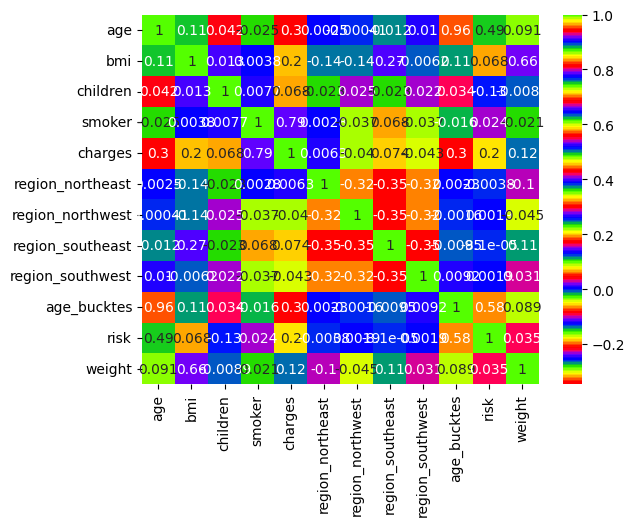

In [65]:
sns.heatmap(df2.corr(),annot=True,cmap = "prism")

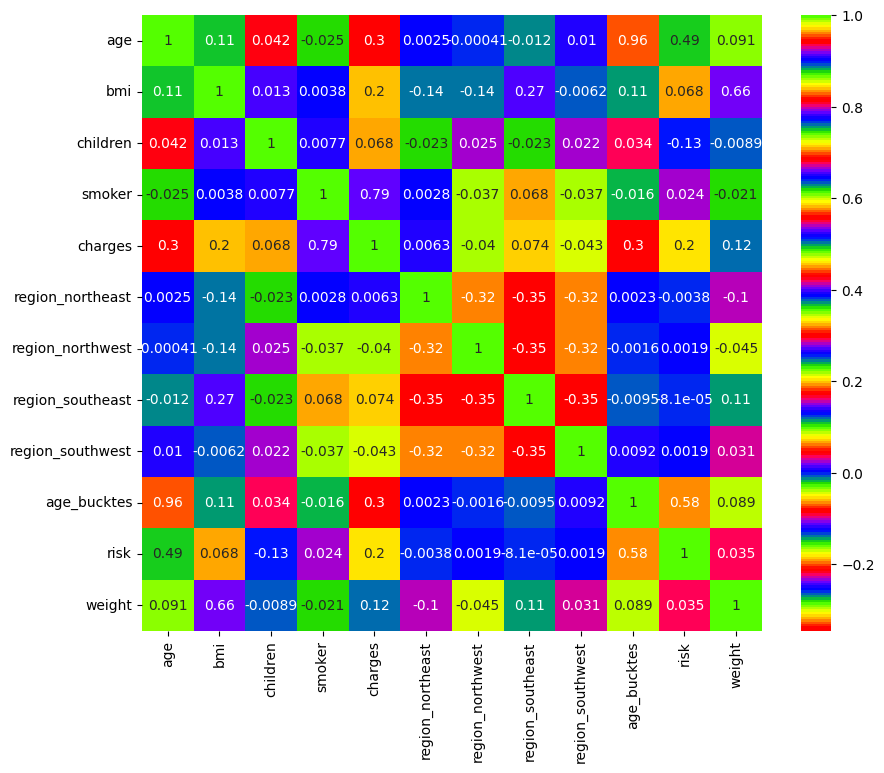

In [68]:
plt.figure(figsize = (10,8))
sns.heatmap(df2.corr(),annot=True,cmap = "prism")
plt.savefig("correlation.png")

#### - Drop duplicated rows

In [69]:
df2[df2.duplicated()].shape

(1, 12)

In [71]:
df3 = df2[~df2.duplicated()]  #used to filter the DataFrame. By using the negated Boolean series,
                               #you are keeping only the rows that are not duplicated.
df3.shape,df2.shape

((1337, 12), (1338, 12))

In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               1337 non-null   int64   
 1   bmi               1337 non-null   float64 
 2   children          1337 non-null   int64   
 3   smoker            1337 non-null   int64   
 4   charges           1337 non-null   float64 
 5   region_northeast  1337 non-null   bool    
 6   region_northwest  1337 non-null   bool    
 7   region_southeast  1337 non-null   bool    
 8   region_southwest  1337 non-null   bool    
 9   age_bucktes       1337 non-null   category
 10  risk              1337 non-null   int64   
 11  weight            1337 non-null   int64   
dtypes: bool(4), category(1), float64(2), int64(5)
memory usage: 90.3 KB


In [74]:
df3["age_bucktes"] = df3["age_bucktes"].astype("int64")

In [75]:
df3["age_bucktes"].dtype

dtype('int64')

### VIF(varience inflation factor)

In [76]:
df3.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age_bucktes', 'risk', 'weight'],
      dtype='object')

In [77]:
df3.drop(["age","bmi"],axis=1,inplace=True)

In [78]:
df3.columns

Index(['children', 'smoker', 'charges', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'age_bucktes', 'risk',
       'weight'],
      dtype='object')

## 6. Model Training and data spliting

In [79]:
x = df3.drop('charges',axis=1)
y = df3['charges']

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [81]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

#### Scaling

In [82]:
std_scalar = StandardScaler()
std_scalar.fit(x_train)
array = std_scalar.transform(x_train)
std_train_df = pd.DataFrame(array,columns=x_train.columns)
std_train_df.head()

,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age_bucktes,risk,weight
0,-0.907908,-0.500292,1.795911,-0.572669,-0.605812,-0.57411,-1.210813,-0.297649,-2.078078
1,0.766904,-0.500292,1.795911,-0.572669,-0.605812,-0.57411,-1.210813,-0.297649,0.481214
2,0.766904,-0.500292,-0.556820,1.746208,-0.605812,-0.57411,0.868479,-0.297649,0.481214
3,-0.907908,-0.500292,-0.556820,-0.572669,1.650678,-0.57411,1.908125,3.359666,0.481214
4,0.766904,-0.500292,1.795911,-0.572669,-0.605812,-0.57411,0.868479,-0.297649,0.481214


In [83]:
knn_model = KNeighborsRegressor()
knn_model.fit(std_train_df,y_train)

KNeighborsRegressor()

## Evaluation

### - on testing data

In [84]:
x_test.head(1)

,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age_bucktes,risk,weight
900,0,0,True,False,False,False,3,0,0


In [85]:
array = std_scalar.transform(x_test)
std_test_df = pd.DataFrame(array,columns=x_test.columns)

In [86]:
y_pred_test = knn_model.predict(std_test_df)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_test,y_pred_test)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_test.shape[0]-1))/ (x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 39925429.20309937
Root mean squared error 6318.657231018262
R2 squared value 0.7827259230249428
adjusted r2 score 0.7751465947583711


### - On training side

In [91]:
array = std_scalar.transform(x_test)
std_test_df = pd.DataFrame(array,columns=x_test.columns)

In [88]:
y_pred_test = knn_model.predict(std_train_df)
mse = mean_squared_error(y_train,y_pred_test)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_train,y_pred_test)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_train.shape[0]-1))/ (x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 31845962.582007434
Root mean squared error 5643.222712423056
R2 squared value 0.7674028462098561
adjusted r2 score 0.7654260998603648


### Hyperparameter Tuning

1) GridSearchCV() : search in grid
2) RandomizedSearchCV() : pick any random value

In [92]:
r2_train_list = []
r2_test_list = []
k_values = range(3,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(std_train_df,y_train)
    ### training side
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
       ### testing side
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)

Text(0, 0.5, 'ACCURACY')

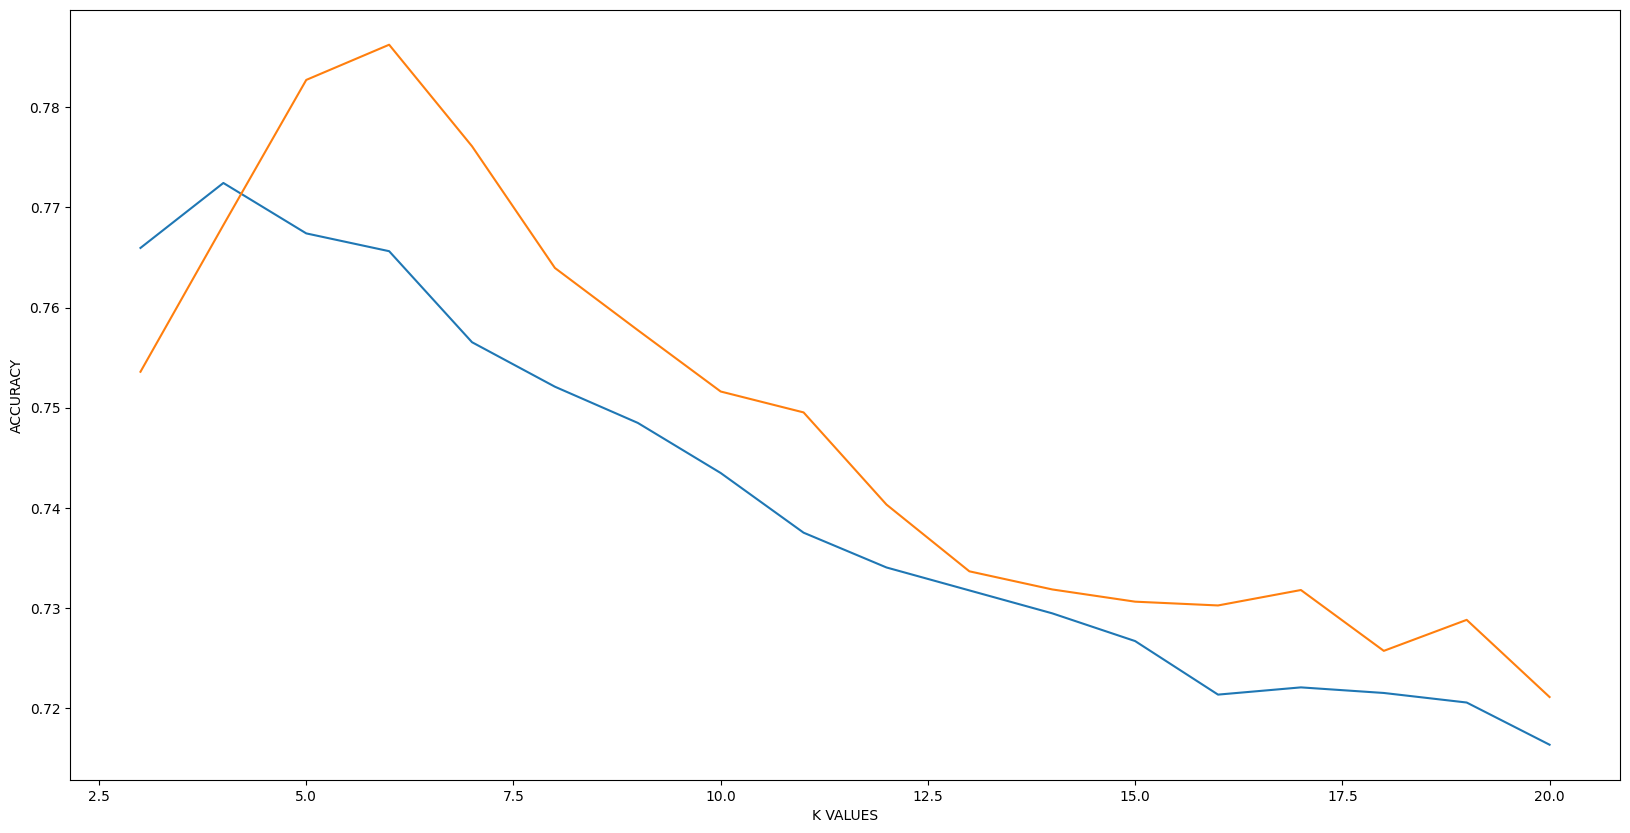

In [93]:
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K VALUES")
plt.ylabel("ACCURACY")

In [94]:
r2_train_list = []
r2_test_list = []
k_values = range(3,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    ### training side
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
       ### testing side
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)

Text(0, 0.5, 'ACCURACY')

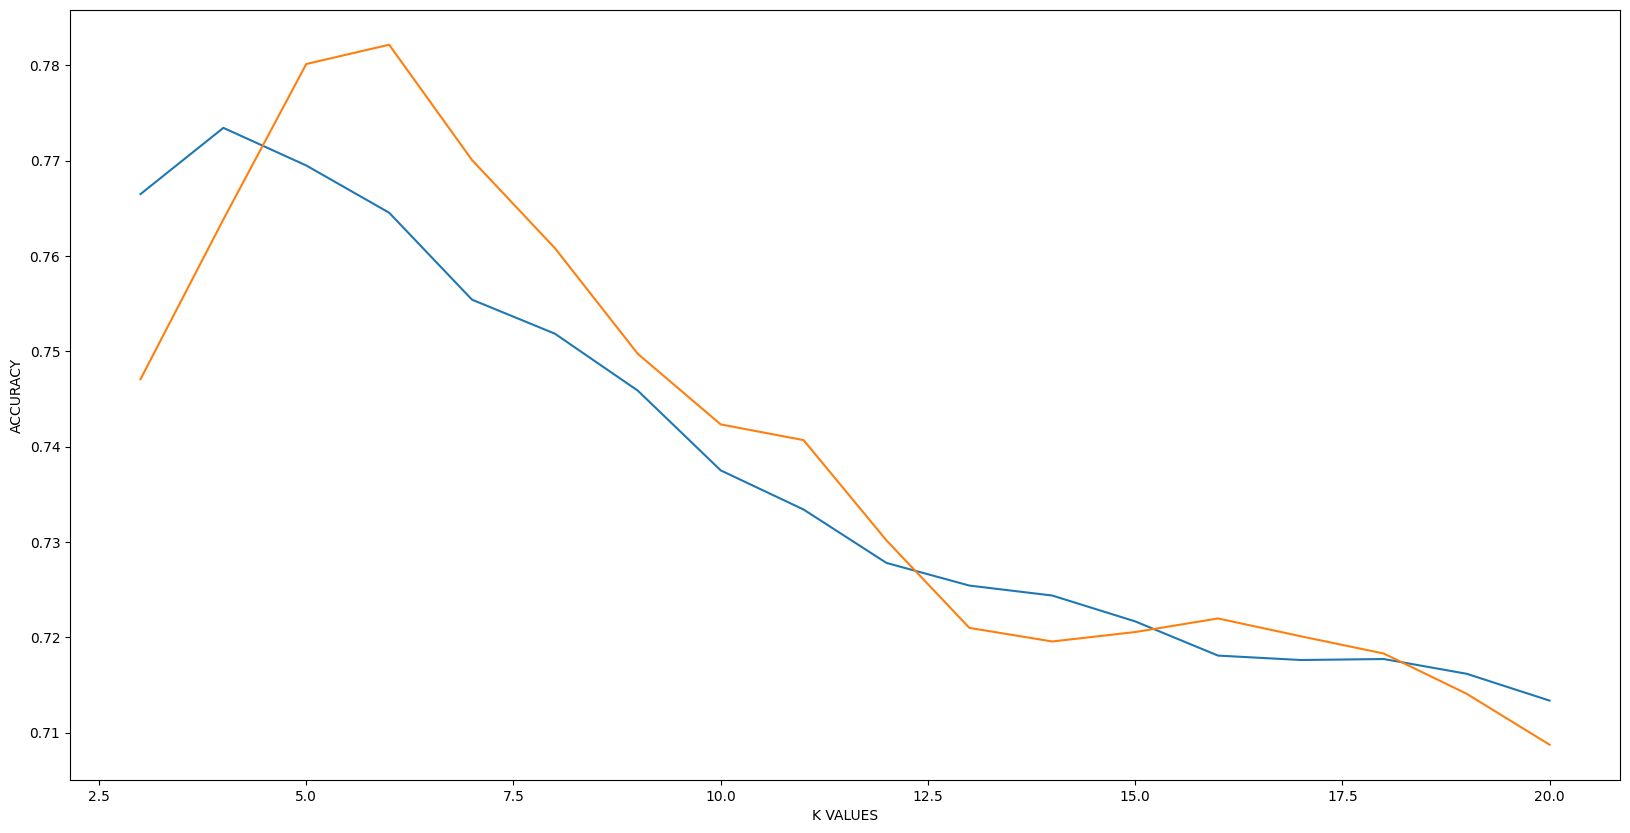

In [95]:
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K VALUES")
plt.ylabel("ACCURACY")

In [96]:
# Based on above graph, we are selecting k = 4

In [97]:
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(std_train_df,y_train)

KNeighborsRegressor(n_neighbors=4)

In [98]:
y_pred_test = knn_model.predict(std_test_df)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_test,y_pred_test)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_test.shape[0]-1))/ (x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 42588647.955821484
Root mean squared error 6525.997851349744
R2 squared value 0.7682326938266593
adjusted r2 score 0.7601477877973567


In [99]:
y_pred_train = knn_model.predict(std_train_df)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_train,y_pred_train)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_train.shape[0]-1))/ (x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 31156731.459116213
Root mean squared error 5581.821518027625
R2 squared value 0.7724368657366724
adjusted r2 score 0.7705029014228197


## Save Final Model

In [100]:
import pickle

In [101]:
with open("KNN_MODEL.pkl","wb") as file:
    pickle.dump(knn_model,file)

In [102]:
with open("scale.pkl","wb") as file:
    pickle.dump(std_scalar,file)

In [103]:
label_json = {
             "smoker" : {"yes":1,"no":0},
             "columns" : list(x.columns)}
label_json

{'smoker': {'yes': 1, 'no': 0},
 'columns': ['children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest',
  'age_bucktes',
  'risk',
  'weight']}

In [104]:
import json

In [105]:
with open("label_encode.json","w") as file:
    json.dump(label_json,file)

### Testing single user input

In [106]:
age     =           19
bmi       =       27.9
children   =         0
smoker      =      "yes"
region  =    "southeast"
# charges    ?

In [110]:
columns_names = label_json["columns"]
test_array = np.zeros(len(columns_names))
test_array[0] = children
test_array[1] = label_json["smoker"][smoker]
region_1= "region_" + region
print(region_1)
region_index = columns_names.index(region_1)
test_array[region_index] = 1
test_array[6] = 0 if age <18 else 1 if age < 30 else 2 if age < 45 else 3 if age <60 else 4
test_array[7]=  1 if age >60  else 0
test_array[8] = 1 if bmi > 25 else 0
test_array

region_southeast


array([0., 1., 0., 0., 1., 0., 1., 0., 1.])

In [111]:
# scaling
std_array  = std_scalar.transform([test_array])
std_array

array([[-0.90790804,  1.99883143, -0.55682046, -0.57266946,  1.65067825,
        -0.57410974, -1.2108134 , -0.29764863,  0.4812139 ]])

In [112]:
# predicting charges
charges_predict = knn_model.predict(std_array)[0]
charges_predict

np.float64(30764.128675)

In [113]:
columns_names = label_json["columns"]
test_array = np.zeros(len(columns_names))
test_array[0] = children
test_array[1] = label_json["smoker"][smoker]
region_1= "region_" + region
print(region_1)
region_index = columns_names.index(region_1)
test_array[region_index] = 1
age_buckets = 0 if age <18 else 1 if age < 30 else 2 if age < 45 else 3 if age <60 else 4
test_array[6] = age_buckets
test_array[7]=  1 if age_buckets == 4  else 0
test_array[8] = 0 if bmi <=24 else 1
test_array

region_southeast


array([0., 1., 0., 0., 1., 0., 1., 0., 1.])